In [10]:
import os
from pprint import pprint
from pymongo import MongoClient
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.ndimage.filters import gaussian_filter1d

%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]

In [6]:
data_dir = '../logs/'
data_files = os.listdir(data_dir)
data = list()
labels = list()

fmt = '{:<20}{}'

for i, file in enumerate(data_files):
    if 'eval' in file:
        with open(data_dir + file, 'r') as f:
            data.append(f.readlines()[1:])
        lab = input(f'Please give a label to {file}: ')
        labels.append(lab)
print('Lines per dataset: ')
for i in range(len(data)):
    print(fmt.format(labels[i], len(data[i])))

Please give a label to online_trial1_1_best_eval.log.log: wm_0
Please give a label to dqn-out-eval.log: dqn
Please give a label to online_trial1_0_best_eval.log.log: wm_1
Lines per dataset: 
wm_0                15000
dqn                 15000
wm_1                15000


In [7]:
def chunk(lst, n):
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

chunked_data = list()

print('Episodes per dataset:')
for i, ds in enumerate(data):
    if 'random' in labels[i].lower():
        chunk_size = 5
    else:
        chunk_size = 6
    chunked_data.append(list(chunk(ds, chunk_size)))
    
    print(fmt.format(labels[i], len(chunked_data[i])))

Episodes per dataset:
wm_0                2500
dqn                 2500
wm_1                2500


In [8]:
seperator = '-'*114
episode_rewards = dict()

for i, chunked_ds in enumerate(chunked_data):
    print(f'{seperator}\n{labels[i]}\n{seperator}')
    
    episode_rew = [float(epi[1].strip().split(': ')[1]) for epi in chunked_ds]
    episode_rewards[labels[i]] = episode_rew
    
    print('\n' + str(stats.describe(episode_rew)))
    print('\nEpisode where max reward occurred:\n' + \
          ''.join(chunked_ds[np.argmin(episode_rew)]))
    print('\nEpisode where max reward occurred:\n' + \
          ''.join(chunked_ds[np.argmax(episode_rew)]))

------------------------------------------------------------------------------------------------------------------
wm_0
------------------------------------------------------------------------------------------------------------------

DescribeResult(nobs=2500, minmax=(91.0, 737.0), mean=231.5396, variance=6578.739927811125, skewness=1.0295161009008829, kurtosis=2.0717072604416646)

Episode where max reward occurred:
09/03/2020 15:34:00 - Episode 1668:               
	latest episode reward: 91.0               
	total episode reward: 384853.0               
	average_reward: 230.6726618705036               
	change in average: -0.0357964378347333               
	average Q_loss: 


Episode where max reward occurred:
09/03/2020 15:11:03 - Episode 1559:               
	latest episode reward: 737.0               
	total episode reward: 360258.0               
	average_reward: 230.61000641436817               
	change in average: -0.06650192966264967               
	average Q_loss: 

--------

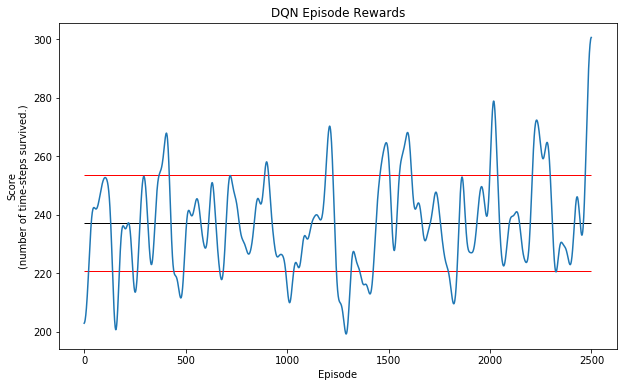

In [12]:
dqn_smoothed = gaussian_filter1d(episode_rewards['dqn'], sigma=15)
plt.title('DQN Episode Rewards')
plt.xlabel('Episode')
plt.ylabel("Score\n(number of time-steps survived.)")
plt.plot(dqn_smoothed)
mean = stats.describe(episode_rewards['dqn']).mean
std = np.std(dqn_smoothed)
plt.hlines(mean, 0, 2500, linewidth=1, color='black')
# plt.annotate(f'{mean:.3f}',
#                  (2500, mean),
#                  textcoords='offset points', xytext=(7.5,-5),
#                  ha='left', color='black')
plt.hlines(mean+std, 0, 2500, linewidth=1, color='red')
# plt.annotate(f'{mean+std:.3f}',
#                  (2500, mean+std),
#                  textcoords='offset points', xytext=(7.5,-5),
#                  ha='left', color='red')
plt.hlines(mean-std, 0, 2500, linewidth=1, color='red')
# plt.annotate(f'{mean-std:.3f}',
#                  (2500, mean-std),
#                  textcoords='offset points', xytext=(7.5,-5),
#                  ha='left', color='red')
# plt.xlim((0,2750))

In [78]:
plt.hist(bins=episode_rewards['dqn'], ec='k')

TypeError: hist() missing 1 required positional argument: 'x'

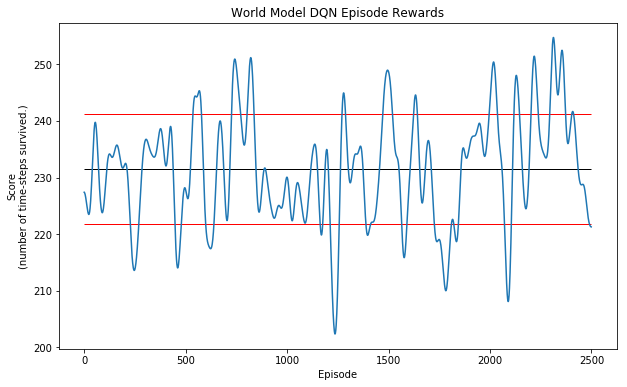

In [14]:
wm_smoothed = gaussian_filter1d(episode_rewards['wm_0'], sigma=15)
plt.title('World Model DQN Episode Rewards')
plt.xlabel('Episode')
plt.ylabel("Score\n(number of time-steps survived.)")
plt.plot(wm_smoothed)
mean = stats.describe(episode_rewards['wm_0']).mean
std = np.std(wm_smoothed)
plt.hlines(mean, 0, 2500, linewidth=1, color='black')
# plt.annotate(f'{mean:.3f}',
#                  (2500, mean),
#                  textcoords='offset points', xytext=(7.5,-5),
#                  ha='left', color='black')
plt.hlines(mean+std, 0, 2500, linewidth=1, color='red')
# plt.annotate(f'{mean+std:.3f}',
#                  (2500, mean+std),
#                  textcoords='offset points', xytext=(7.5,-5),
#                  ha='left', color='red')
plt.hlines(mean-std, 0, 2500, linewidth=1, color='red')
# plt.annotate(f'{mean-std:.3f}',
#                  (2500, mean-std),
#                  textcoords='offset points', xytext=(7.5,-5),
#                  ha='left', color='red')
# plt.xlim((0,2750))

(0, 2750)

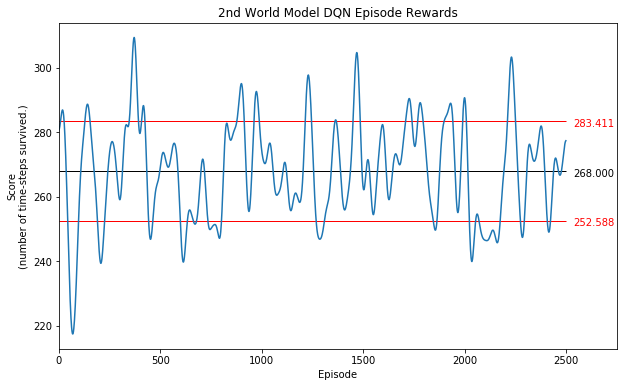

In [15]:
wm_2_smoothed = gaussian_filter1d(episode_rewards['wm_1'], sigma=15)
plt.title('2nd World Model DQN Episode Rewards')
plt.xlabel('Episode')
plt.ylabel("Score\n(number of time-steps survived.)")
plt.plot(wm_2_smoothed)
mean = stats.describe(episode_rewards['wm_1']).mean
std = np.std(wm_2_smoothed)
plt.hlines(mean, 0, 2500, linewidth=1, color='black')
plt.annotate(f'{mean:.3f}',
                 (2500, mean),
                 textcoords='offset points', xytext=(7.5,-5),
                 ha='left', color='black')
plt.hlines(mean+std, 0, 2500, linewidth=1, color='red')
plt.annotate(f'{mean+std:.3f}',
                 (2500, mean+std),
                 textcoords='offset points', xytext=(7.5,-5),
                 ha='left', color='red')
plt.hlines(mean-std, 0, 2500, linewidth=1, color='red')
plt.annotate(f'{mean-std:.3f}',
                 (2500, mean-std),
                 textcoords='offset points', xytext=(7.5,-5),
                 ha='left', color='red')
plt.xlim((0,2750))